In [5]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import gc
from sklearn.metrics import f1_score, accuracy_score, mean_absolute_error, confusion_matrix
import lightgbm as lgb
import random
import pickle
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold, KFold
import time
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint                                            # import
column = {'BT1':2, 'BT2':3, 'BT3':4,'BT4':5, 'BT5':6, 'BT6':7, 'BT7':8, 'BT8':9, 'BT9':10,
          'type':11, 'GMI_lon':12, 'GMI_lat':13, 'DPR_lon':14, 'DPR_lat':15, 'target':16}

In [6]:
train_files = glob.glob('../dataset/train/*.npy')
train_files = sorted(train_files)
test_files = glob.glob('../dataset/test/*.npy')
test_files = sorted(test_files)

In [9]:
%%time

def train_add_gen(file):
    data = np.load(file)
    data = np.pad(data,2, 'constant', constant_values=0)
    li = []
    for h in (range(2, 42)):
        for w in range(2, 42):
            means, maxs, mean_val_diffs, max_val_diffs, MAX_val_diffs = [], [], [], [], []
            for btn in (['BT1', 'BT2', 'BT3', 'BT4', 'BT5', 'BT6' ,'BT7', 'BT8', 'BT9']):
                BT_vals = data[:,:,column[btn]].reshape(-1)
                BT_MAX = BT_vals[BT_vals!=0].max()
                val = data[h,w, column[btn]]
                BT = data[h-2:h+3, w-2:w+3, column[btn]]
                BT = BT[BT!=0]
                means.append(BT.mean())
                maxs.append(BT.max())
                mean_val_diffs.append(means[-1] - val)
                max_val_diffs.append(maxs[-1] - val)
                MAX_val_diffs.append(BT_MAX - val)
            li.append([means, maxs, mean_val_diffs, max_val_diffs, MAX_val_diffs])
    np.save('../dataset/train_add/'+file.split('/')[-1][:-4]+'_add',np.array(li).astype(np.float32))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.5 µs


In [10]:
%%time
i=0
RANGE = range(i*7634,(i+1)*7634)
print(RANGE)
for file in tqdm_notebook(RANGE):
    train_add_gen(train_files[file])

range(0, 7634)




CPU times: user 38min 28s, sys: 4.3 s, total: 38min 32s
Wall time: 39min 6s


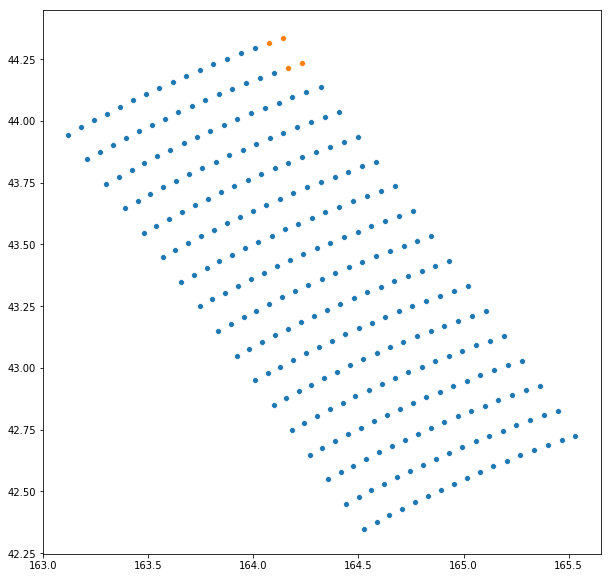

In [220]:
plt.figure(figsize=(10,10))
# for i in range(40):
sns.scatterplot(data[3:20,3:20,column['GMI_lon']].reshape(-1), data[3:20,3:20,column['GMI_lat']].reshape(-1))
# n=4
sns.scatterplot(data[3:5,3:5,column['GMI_lon']].reshape(-1), data[3:5, 3:5, column['GMI_lat']].reshape(-1))